In [1]:
import numpy as np
import cv2 as cv
import math
import random

In [47]:
#vec2 hash( in vec2 x )  // replace this by something better
#{
#    const vec2 k = vec2( 0.3183099, 0.3678794 );
#    x = x*k + k.yx;
#    return -1.0 + 2.0*fract( 16.0 * k*fract( x.x*x.y*(x.x+x.y)) );
#}


def hasha(x):   
    k=np.array([0.3183099, 0.3678794])
    x = x*k + [k[1],k[0]]
    tmp=16.0 * k *math.modf(x[0]*x[1]*(x[0]+x[1]))[0]
    f=np.array([math.modf(tmp[0])[0],math.modf(tmp[1])[0]])
    return -1.0 + 2.0*f




In [48]:
// return gradient noise (in x) and its derivatives (in yz)
vec3 noised( in vec2 p )
{
    vec2 i = floor( p );
    vec2 f = fract( p );

#if 1
    // quintic interpolation
    vec2 u = f*f*f*(f*(f*6.0-15.0)+10.0);
    vec2 du = 30.0*f*f*(f*(f-2.0)+1.0);
#else
    // cubic interpolation
    vec2 u = f*f*(3.0-2.0*f);
    vec2 du = 6.0*f*(1.0-f);
#endif    
    
    vec2 ga = hasha( i + vec2(0.0,0.0) );
    vec2 gb = hasha( i + vec2(1.0,0.0) );
    vec2 gc = hasha( i + vec2(0.0,1.0) );
    vec2 gd = hasha( i + vec2(1.0,1.0) );
    
    float va = dot( ga, f - vec2(0.0,0.0) );
    float vb = dot( gb, f - vec2(1.0,0.0) );
    float vc = dot( gc, f - vec2(0.0,1.0) );
    float vd = dot( gd, f - vec2(1.0,1.0) );

    return vec3( va + u.x*(vb-va) + u.y*(vc-va) + u.x*u.y*(va-vb-vc+vd),   // value
                 ga + u.x*(gb-ga) + u.y*(gc-ga) + u.x*u.y*(ga-gb-gc+gd) +  // derivatives
                 du * (u.yx*(va-vb-vc+vd) + vec2(vb,vc) - va));
}

SyntaxError: invalid syntax (<ipython-input-48-f0d6d5947ab1>, line 1)

In [49]:
def noise(p):
    i=np.array([math.floor(p[0]),math.floor(p[1])])
    f=np.array([math.modf(p[0])[0],math.modf(p[1])[0]])
    
    u = f*f*f*(f*(f*6.0-15.0)+10.0)
    du = 30.0*f*f*(f*(f-2.0)+1.0)
    
    ga = hash( i + np.array([0.0,0.0]) )
    gb = hash( i + np.array([1.0,0.0]) )
    gc = hash( i + np.array([0.0,1.0]) )
    gd = hash( i + np.array([1.0,1.0]) )
    
    va = np.dot( ga, f - np.array([0.0,0.0]) )
    vb = np.dot( gb, f - np.array([1.0,0.0]) )
    vc = np.dot( gc, f - np.array([0.0,1.0]) )
    vd = np.dot( gd, f - np.array([1.0,1.0]) )
    
    derivatives = ga + u[0] * (gb - ga) + u[1] * (gc - ga) + u[0] * u[1] * (ga - gb - gc +gd) + du * (np.array([u[1],u[0]]) * (va - vb - vc + vd) + np.array([vb,vc]) - va);
    return np.array([va + u[0]*(vb-va) + u[1]*(vc-va) + u[0]*u[1]*(va-vb-vc+vd),derivatives[0],derivatives[1]])

In [39]:
void mainImage( out vec4 fragColor, in vec2 fragCoord )
{
    vec2 p = (2.0*fragCoord-iResolution.xy)/iResolution.y;
    
    vec3 n = noised( 8.0*p + iTime*4.0 );

    vec3 col = 0.5 + 0.5*((p.x>0.0) ? n.yzx : n.xxx);
    
	fragColor = vec4( col, 1.0 );
}



5

In [67]:
img=np.arange(30000).reshape(100,100,3)
iResolution=np.array([100,100])
iTime=0.5 #???
for i in range(100):
    for j in range(100):
        iTime=random.randint(0,10000)/10000
        p=(2*np.array([i,j])-iResolution)/iResolution[1]
        n=noise(8.0*p + iTime*4.0)
        if p[0]>0.0:
            tmp=np.array([n[1],n[2],n[0]])
        else:
            tmp=np.array([n[0],n[0],n[0]])
        col=0.5 + 0.5*(tmp)
        img[i,j]=col

In [70]:
img

array([[[683, 683, 683],
        [-39, -39, -39],
        [  4,   4,   4],
        ...,
        [  0,   0,   0],
        [ -8,  -8,  -8],
        [ -1,  -1,  -1]],

       [[  0,   0,   0],
        [ -8,  -8,  -8],
        [  0,   0,   0],
        ...,
        [ -2,  -2,  -2],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [-13, -13, -13],
        [ -3,  -3,  -3],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ -9,  -9,  -9]],

       ...,

       [[  1,   6,   0],
        [  1,   0,   0],
        [ -2,  72, -11],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,  12,   0],
        [  5,  80, -16],
        [  0,   6,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   9,   0],
        [ 31, 128, -30],
        [  1,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------

In [33]:
deltaI=10
A=10
imgP=cv.imread("test.png")
srcP=cv.imread("test.png")
def onTrackbar(angle):
    width=200
    height=200
    for y in range(height):
        changeX = A*math.sin(angle)
        for x in range(width):
            if changeX+x<width and changeX+x>0:
                imgP[3*x]=srcP[int(3*(x+changeX))]
                imgP[3*x+1]=srcP[int(3*(x+changeX))+1]
                imgP[3*x+2]=srcP[int(3*(x+changeX))+2]
            elif x<=changeX:
                imgP[3*x]=srcP[0]
                imgP[3*x+1]=srcP[1]
                imgP[3*x+2]=srcP[2]
            elif x>=width-changeX:
                imgP[3*x]=srcP[3*(width-1)]
                imgP[3*x+1]=srcP[3*(width-1)+1]
                imgP[3*x+2]=srcP[3*(width-1)+2]
            
        angle += (deltaI)/100;

In [34]:
imgP.shape

(720, 1080, 3)

In [35]:
a=1
onTrackbar(a)

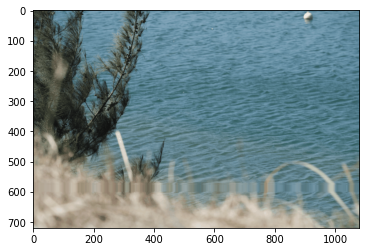

In [36]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(imgP,cv.COLOR_BGR2RGB))

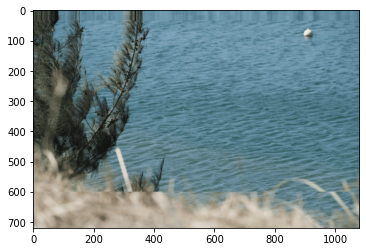

In [37]:
a=10
onTrackbar(a)
plt.imshow(cv.cvtColor(imgP,cv.COLOR_BGR2RGB))